In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import baikalfunctions as bfunc
import scheme_mar2023 as scheme
import mysecure

In [3]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [228]:
# pd.set_option('display.min_rows', 100)
%matplotlib inline
plt.style.use('dark_background')   # try another styles: 'classic'
plt.rcParams['figure.figsize'] = [15, 5]
#plt.subplots_adjust(top=1, left=0, right=1, bottom=0)

In [308]:
pwd = 'G:\\1_Data1\\95_BaikalOct2023\\'
saveImgPath = 'G:\\1_Data1\\95_BaikalOct2023\\'
saveDataPath = 'G:\\1_Data1\\95_BaikalOct2023\\'

In [272]:
df = pd.read_csv(pwd+'origin.dat', sep='\t', parse_dates=['date_time'], dayfirst=True, header=[0], na_values='--', decimal=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34304 entries, 0 to 34303
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_time         34297 non-null  datetime64[ns]
 1   solar_altitude    34297 non-null  float64       
 2   solar_azimuth     34297 non-null  float64       
 3   temperature_air   34277 non-null  float64       
 4   pressure_air      34277 non-null  float64       
 5   precipitation     34277 non-null  float64       
 6   solar_eye         34277 non-null  float64       
 7   solar_uv          34276 non-null  float64       
 8   co2_picarro       33463 non-null  float64       
 9   ch4_picarro       33463 non-null  float64       
 10  h2o_picarro       33463 non-null  float64       
 11  flow_air          34272 non-null  float64       
 12  channel           34301 non-null  float64       
 13  comment           0 non-null      float64       
 14  water_flow_1      3420

In [273]:
df.head(500).tail(200).sample(5)

,date_time,solar_altitude,solar_azimuth,temperature_air,pressure_air,precipitation,solar_eye,solar_uv,co2_picarro,ch4_picarro,h2o_picarro,flow_air,channel,comment,water_flow_1,water_flow_2,temperature_ds_1,temperature_ds_2,temperature_ds_3,fluo_nx_red,fluo_nx_green,fluo_nx_blue,fluo_kfa_red,fluo_kfa_green,fluo_kfa_blue
368,2023-10-01 14:56:24,29.01105,216.88758,22.77,95848.9,0.0,34467.0,100.39,318.053,5.023,0.097,0.55,2.0,NaN,4.322,4.322,13.567,13.581,19.925,NaN,NaN,NaN,NaN,NaN,NaN
302,2023-10-01 14:34:19,30.91749,210.90978,23.25,95840.1,0.0,39096.0,115.11,436.611,2.036,0.178,0.55,5.0,NaN,4.348,4.348,13.696,13.372,20.494,NaN,NaN,NaN,NaN,NaN,NaN
318,2023-10-01 14:39:40,30.48306,212.37969,23.52,95841.2,0.0,37601.0,109.02,436.873,2.023,0.127,0.55,5.0,NaN,4.296,4.296,13.648,13.317,20.518,NaN,NaN,NaN,NaN,NaN,NaN
471,2023-10-01 15:30:53,25.49239,225.72971,23.50,95819.5,0.0,28200.0,83.43,300.356,3.172,0.104,0.55,1.0,NaN,4.439,4.439,13.500,13.403,19.964,NaN,NaN,NaN,NaN,NaN,NaN
370,2023-10-01 14:57:04,28.94904,217.06406,22.78,95850.3,0.0,31334.0,96.14,312.945,5.194,0.097,0.55,2.0,NaN,4.309,4.309,13.602,13.512,19.912,NaN,NaN,NaN,NaN,NaN,NaN


In [274]:
list(df.columns)

['date_time',
 'solar_altitude',
 'solar_azimuth',
 'temperature_air',
 'pressure_air',
 'precipitation',
 'solar_eye',
 'solar_uv',
 'co2_picarro',
 'ch4_picarro',
 'h2o_picarro',
 'flow_air',
 'channel',
 'comment',
 'water_flow_1',
 'water_flow_2',
 'temperature_ds_1',
 'temperature_ds_2',
 'temperature_ds_3',
 'fluo_nx_red',
 'fluo_nx_green',
 'fluo_nx_blue',
 'fluo_kfa_red',
 'fluo_kfa_green',
 'fluo_kfa_blue']

In [275]:
df.rename(columns=scheme.NAME_CONV_BAS, inplace=True)
df.sort_values(by='DateTime', inplace=True)
df.reset_index(inplace=True, drop=True)
df.head(2)

,DateTime,solar_altitude,solar_azimuth,TempAir,PressAir,Precipitation,LightLX,LightUV,vCO2,vCH4,vH2O,AirFlow,Channel,Comments,WaterFlowEqu1,WaterFlowEqu2,TempEqu1,TempEqu2,TempEqu3,FluoNxRed,FluoNxGrn,FluoNxBlu,FluoKfaRed,FluoKfaGrn,FluoKfaBlu
0,2023-10-01 12:02:45,34.38410,165.77392,23.33,95940.2,0.0,50135.0,125.0,NaN,NaN,NaN,0.57,0.0,NaN,0.043,0.043,13.210,13.000,17.690,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-10-01 12:03:05,34.39688,165.87580,23.28,95937.7,0.0,50135.0,125.0,NaN,NaN,NaN,0.57,5.0,NaN,0.000,0.000,13.226,12.964,17.708,NaN,NaN,NaN,NaN,NaN,NaN


In [276]:
df.sort_values(by='DateTime', inplace=True)

In [277]:
### remove service variables
df.drop([x for x in df.columns if x.lower().endswith('err')], axis='columns', inplace=True, errors='ignore')
df.drop([x for x in df.columns if x.lower().endswith('max')], axis='columns', inplace=True, errors='ignore')
df.drop([x for x in df.columns if x.lower().endswith('min')], axis='columns', inplace=True, errors='ignore')
df.drop([x for x in df.columns if x.lower().startswith('pump')], axis='columns', inplace=True, errors='ignore')
df.drop(['HumidityAir', ], axis='columns', inplace=True, errors='ignore')


In [278]:
df.shape, df.columns

((34304, 25),
 Index(['DateTime', 'solar_altitude', 'solar_azimuth', 'TempAir', 'PressAir',
        'Precipitation', 'LightLX', 'LightUV', 'vCO2', 'vCH4', 'vH2O',
        'AirFlow', 'Channel', 'Comments', 'WaterFlowEqu1', 'WaterFlowEqu2',
        'TempEqu1', 'TempEqu2', 'TempEqu3', 'FluoNxRed', 'FluoNxGrn',
        'FluoNxBlu', 'FluoKfaRed', 'FluoKfaGrn', 'FluoKfaBlu'],
       dtype='object'))

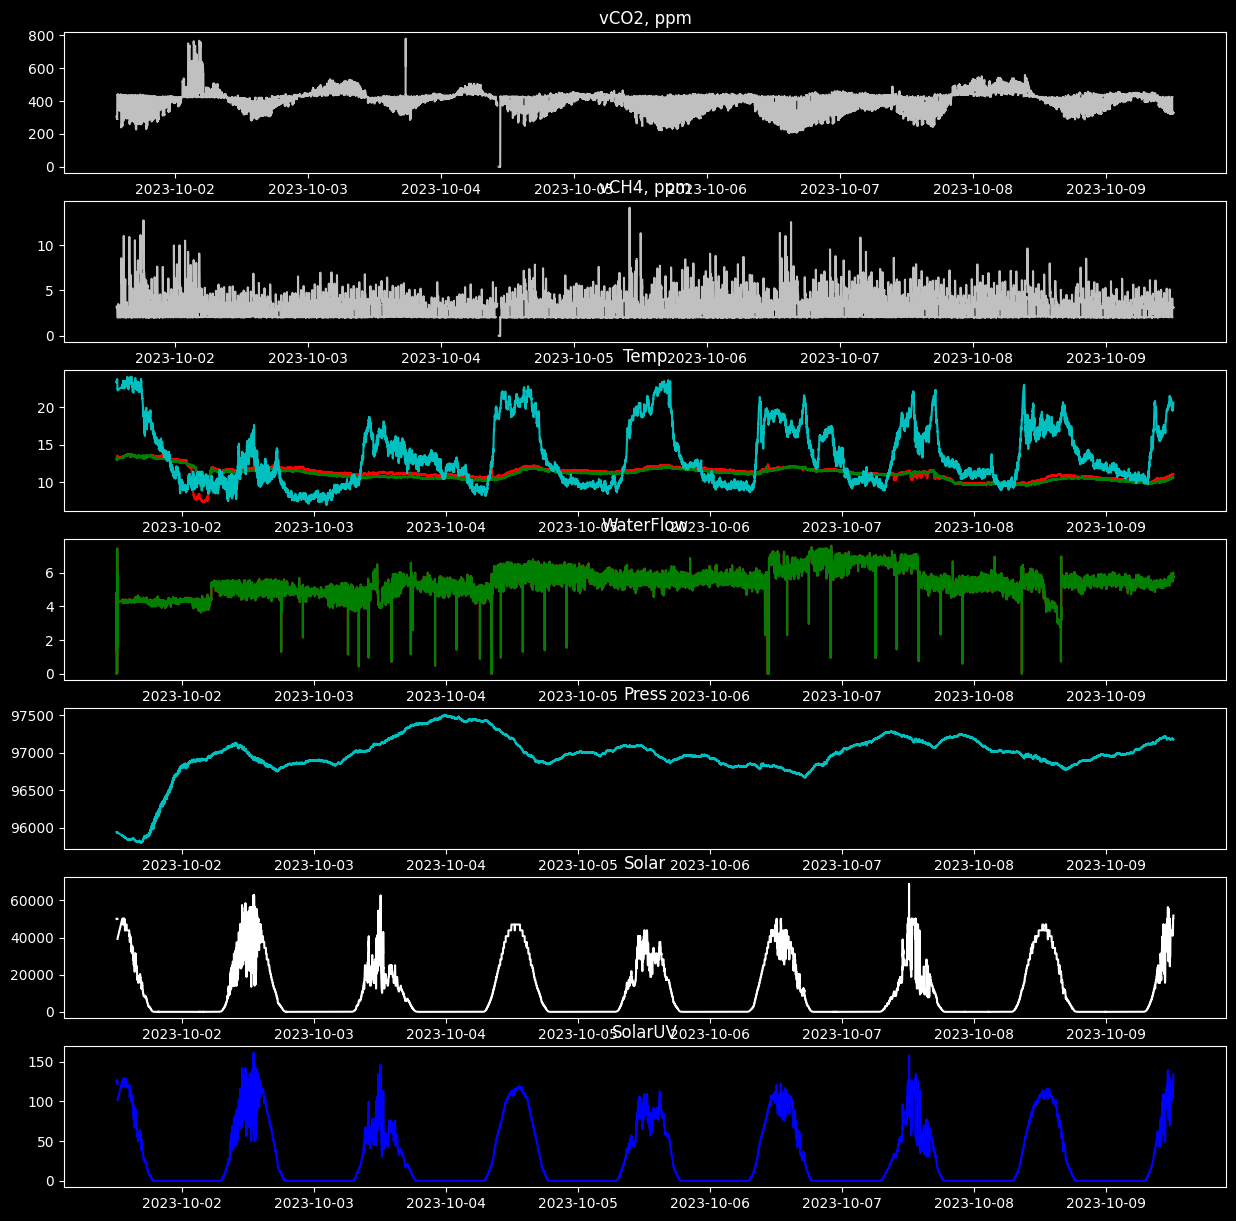

In [279]:
plt.rcParams['figure.figsize'] = [15, 15]
fig, axs = plt.subplots(7, 1)

axs[0].set_title('vCO2, ppm')
axs[0].plot(df.DateTime, df['vCO2'], '-', c='silver')

axs[1].set_title('vCH4, ppm')
axs[1].plot(df.DateTime, df['vCH4'], '-', c='silver')

axs[2].set_title('Temp')
axs[2].plot(df.DateTime, df['TempEqu1'], 'r-')
axs[2].plot(df.DateTime, df['TempEqu2'], 'g-')
axs[2].plot(df.DateTime, df['TempAir'], 'c-')

axs[3].set_title('WaterFlow')
axs[3].plot(df.DateTime, df['WaterFlowEqu1'], 'r-')
axs[3].plot(df.DateTime, df['WaterFlowEqu2'], 'g-')

axs[4].set_title('Press')
axs[4].plot(df.DateTime, df['PressAir'], 'c-')
axs[5].set_title('Solar')
axs[5].plot(df.DateTime, df['LightLX'], 'w-')
axs[6].set_title('SolarUV')
axs[6].plot(df.DateTime, df['LightUV'], 'b-')



### Correction data  
 ** Be carefull !!!  Make it ONCE !!! **


In [280]:
## gether/apply specific variables
### data corrections
# df['vCO2'] = df['vCO2'] * scheme.CO2PicarroScaut_cor[0] + scheme.CO2PicarroScaut_cor[1]
# df['vCH4'] = df['vCH4'] * scheme.CH4PicarroScaut_cor[0] + scheme.CH4PicarroScaut_cor[1]
# df['vCO2'] = df['CO2_dry']
# df['vCH4'] = df['CH4_dry']
df['LightLX'] = df['LightLX'] * scheme.solar_cor[0] + scheme.solar_cor[1]
df['LightUV'] = df['LightUV'] * scheme.solar_uv_cor[0] + scheme.solar_uv_cor[1]
df['PressAir'] = bfunc.pressConvert(df['PressAir'])
df['PressAir'] = df['PressAir'] * scheme.press_cor[0] + scheme.press_cor[1]

### servise data corrections
df['TempEqu1'] = df['TempEqu1'] * scheme.tempEqu1_cor[0] + scheme.tempEqu1_cor[1]
df['TempEqu2'] = df['TempEqu2'] * scheme.tempEqu2_cor[0] + scheme.tempEqu2_cor[1]

df['AirFlow'] = df['AirFlow'] * scheme.airflow_cor[0] + scheme.airflow_cor[1]
df['WaterFlowEqu1'] = df['WaterFlowEqu1'] * scheme.waterflowEqu1_cor[0] + scheme.waterflowEqu1_cor[1]
df['WaterFlowEqu2'] = df['WaterFlowEqu2'] * scheme.waterflowEqu2_cor[0] + scheme.waterflowEqu2_cor[1]


<Axes: xlabel='DateTime'>

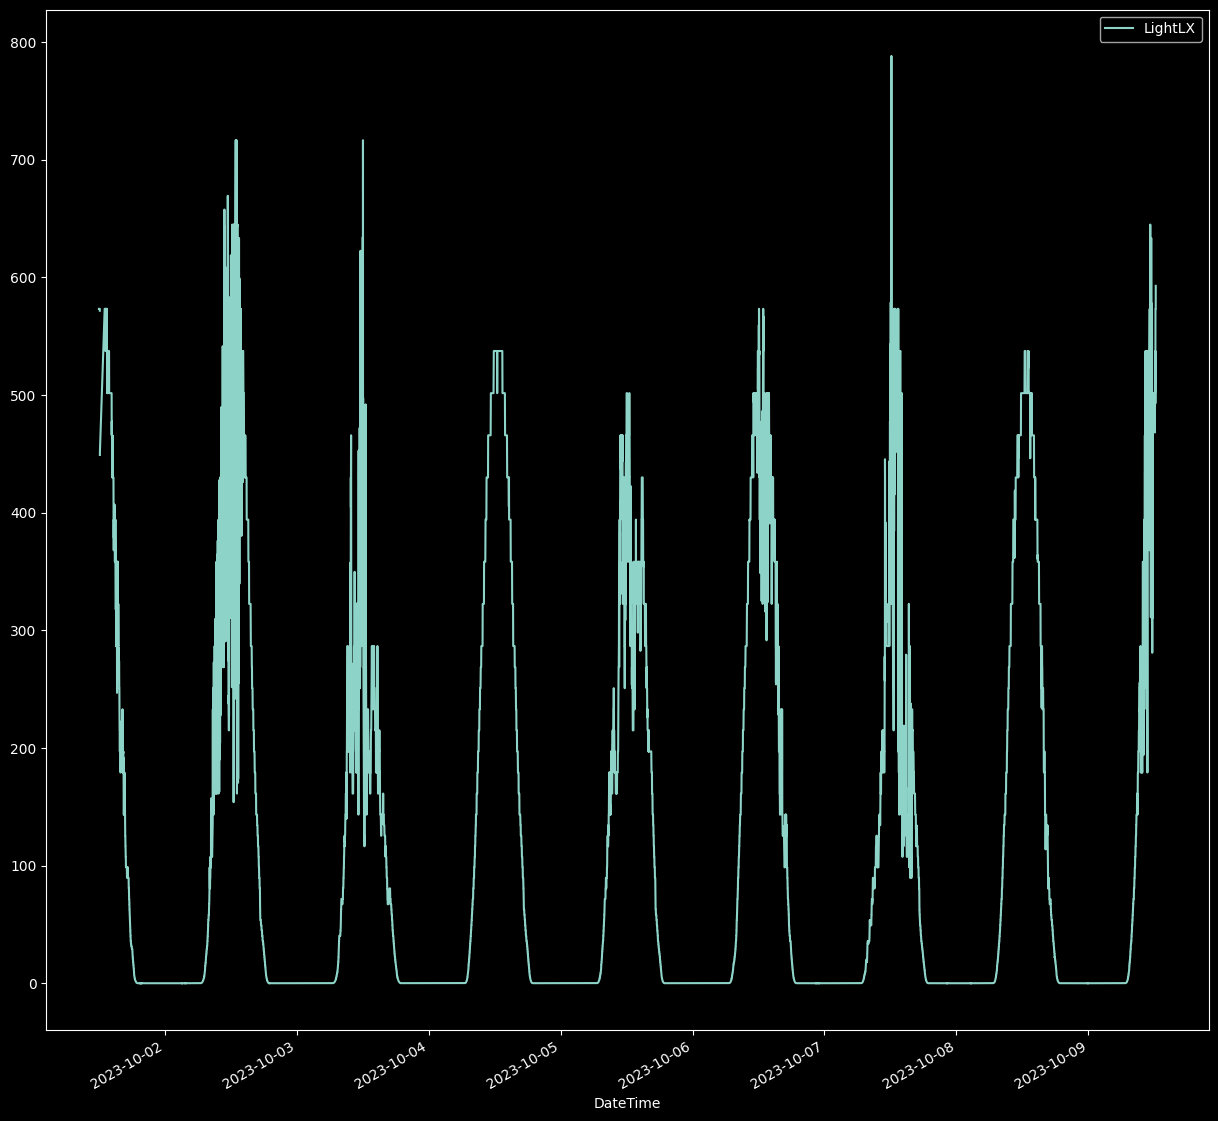

In [281]:
df.plot('DateTime', 'LightLX')

In [282]:
v_state_list = list(scheme.CHANNEL_COLS.values())

chnl = 'Channel'
if not chnl in df.columns:
    df[chnl] = 0
if 'V1_state' in df.columns:
    df.loc[df.V1_state == 1, chnl] = 1
    df.loc[df.V2_state == 1, chnl] = 2
    df.loc[df.V3_state == 1, chnl] = 3
    df.loc[df.V4_state == 1, chnl] = 4
    df.loc[df.V5_state == 1, chnl] = 5
    df.loc[df.V6_state == 1, chnl] = 6
df.drop(v_state_list, inplace=True, errors='ignore')

###  Remove bad data   
List of accidental cases to filter data (see notes)

In [283]:
filter_list = [{'date_start': '01.08.2023 00:00', 'date_stop': '01.08.2023 13:00', 'cols': ['vCO2', 'vCH4'], 'fill_with': np.NaN},   # Picarro is not ready
               {'date_start': '01.08.2023 13:32', 'date_stop': '01.08.2023 13:35', 'cols': ['vCO2', 'vCH4'], 'fill_with': np.NaN},   # Picarro data is zero
               {'date_start': '01.08.2023 17:00', 'date_stop': '01.08.2023 17:20', 'cols': ['vCO2', 'vCH4'], 'fill_with': np.NaN},   # Picarro gas pipe fault
               {'date_start': '01.08.2023 17:19', 'date_stop': '01.08.2023 17:25', 'cols': ['vCO2', 'vCH4'], 'fill_with': np.NaN},   # Picarro gas pipe fault
               {'date_start': '02.08.2023 10:54', 'date_stop': '02.08.2023 10:59', 'cols': ['vCO2', 'vCH4'], 'fill_with': np.NaN},   # gas pipe fault, change of desiccant
               {'date_start': '04.08.2023 11:05', 'date_stop': '04.08.2023 11:10', 'cols': ['vCO2', 'vCH4'], 'fill_with': np.NaN},   # gas pipe fault, change of desiccant
               {'date_start': '04.08.2023 12:26', 'date_stop': '04.08.2023 14:39', 'cols': ['WaterFlowEqu1'], 'fill_with': 0},       # water flow unstable
               {'date_start': '04.08.2023 14:30', 'date_stop': '04.08.2023 14:37', 'cols': ['vCO2', 'vCH4'], 'fill_with': np.NaN},   # pump 'surface' disconnected
               {'date_start': '05.08.2023 02:30', 'date_stop': '05.08.2023 08:06', 'cols': ['TempEqu2'], 'fill_with': np.NaN},       # temperature sensor pulled out
               {'date_start': '06.08.2023 16:55', 'date_stop': '06.08.2023 16:59', 'cols': ['TempEqu2'], 'fill_with': np.NaN},       # temperature sensor pulled out
               {'date_start': '07.08.2023 13:23', 'date_stop': '07.08.2023 16:06', 'cols': ['vCO2', 'vCH4'], 'fill_with': np.NaN},   # channel selector unit disfunction
               {'date_start': '07.08.2023 13:42', 'date_stop': '07.08.2023 16:56', 'cols': ['WaterFlowEqu1', 'WaterFlowEqu2'], 'fill_with': 0},  # water flow unstable
               {'date_start': '07.08.2023 16:19', 'date_stop': '07.08.2023 16:44', 'cols': ['TempEqu2'], 'fill_with': np.NaN},       # temperature sensor pulled out
               {'date_start': '08.08.2023 06:56', 'date_stop': '08.08.2023 10:56', 'cols': ['WaterFlowEqu1'], 'fill_with': 0},       # water flow unstable
               {'date_start': '08.08.2023 02:30', 'date_stop': '08.08.2023 10:00', 'cols': ['TempEqu2'], 'fill_with': np.NaN},
               {'date_start': '08.08.2023 10:43', 'date_stop': '08.08.2023 10:51', 'cols': ['TempEqu1'], 'fill_with': np.NaN},       # water flow unstable
               {'date_start': '08.08.2023 11:22', 'date_stop': '08.08.2023 11:30', 'cols': ['WaterFlowEqu2'], 'fill_with': 0},       # water flow unstable
               {'date_start': '08.08.2023 11:22', 'date_stop': '08.08.2023 11:30', 'cols': ['TempEqu2'], 'fill_with': np.NaN},
               {'date_start': '08.08.2023 14:51', 'date_stop': '08.08.2023 14:59', 'cols': ['TempEqu1'], 'fill_with': np.NaN},
              ]

for cycle in filter_list:
    for col in cycle['cols']:
        date_start = pd.to_datetime(cycle['date_start'], dayfirst=True)
        date_stop = pd.to_datetime(cycle['date_stop'], dayfirst=True)
        df.loc[(df['DateTime'] > date_start) & (df['DateTime'] < date_stop), col] = cycle['fill_with']

In [284]:
cols = ['FluoNxRed', 'FluoNxGrn', 'FluoNxBlu', 'FluoKfaRed', 'FluoKfaGrn', 'FluoKfaBlu']
for col in cols:
    df.loc[df[col] == 0, col] = np.NaN
cols = ['WaterFlowEqu1', 'WaterFlowEqu2', 'AirFlow']
for col in cols:
    df.loc[df[col] < 0, col] = np.NaN

## Flux calc

In [285]:
df

,DateTime,solar_altitude,solar_azimuth,TempAir,PressAir,Precipitation,LightLX,LightUV,vCO2,vCH4,vH2O,AirFlow,Channel,Comments,WaterFlowEqu1,WaterFlowEqu2,TempEqu1,TempEqu2,TempEqu3,FluoNxRed,FluoNxGrn,FluoNxBlu,FluoKfaRed,FluoKfaGrn,FluoKfaBlu
0,2023-10-01 12:02:45,34.38410,165.77392,23.33,0.946856,0.0,573.14332,0.027412,NaN,NaN,NaN,0.42791,0.0,NaN,0.043,0.043,13.660,12.800,17.690,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-10-01 12:03:05,34.39688,165.87580,23.28,0.946831,0.0,573.14332,0.027412,NaN,NaN,NaN,0.42791,5.0,NaN,0.000,0.000,13.676,12.764,17.708,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-10-01 12:03:25,34.40936,165.97615,23.30,0.946848,0.0,573.14332,0.027437,NaN,NaN,NaN,0.42791,5.0,NaN,4.362,4.362,13.724,12.770,17.696,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-10-01 12:03:46,34.42174,166.07638,23.46,0.946832,0.0,573.14332,0.027553,NaN,NaN,NaN,0.42791,5.0,NaN,4.748,4.748,13.718,12.764,17.702,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-10-01 12:04:06,34.43395,166.17603,23.54,0.946812,0.0,573.14332,0.027632,NaN,NaN,NaN,0.42791,5.0,NaN,4.735,4.735,13.706,12.746,17.675,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34299,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34300,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34301,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34302,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [286]:
### find the moments where flux is valid to calculate
### before 02.10.2023 15:30 there was long cycle flux measure
### after this time a short cycle took place

t = pd.to_datetime('02.10.2023 15:30', dayfirst=True)
df['flag'] = (df['Channel'] == 5) 
for deep in range(50):
    df['flag'] &= (df['Channel'] == df['Channel'].shift(deep))

tempflag = (df['Channel'] == 5) & (df['DateTime'] > t) 

for deep in range(10):
    tempflag &= (df['Channel'] == df['Channel'].shift(deep))

df['flag'] |= tempflag
# set flag for 50 points skipping first 10 points  
df['flag'] = df['flag'].astype('int8')
# count flux cycles for grouping
df['fluxEvent'] = (df['flag']==0) & (df['flag'].shift(-1)!=0)
df['fluxCount'] = df['fluxEvent'].cumsum() * df['flag']
#df['flag'] |= (df['Channel'] == 5) & (df['DateTime'] > t)

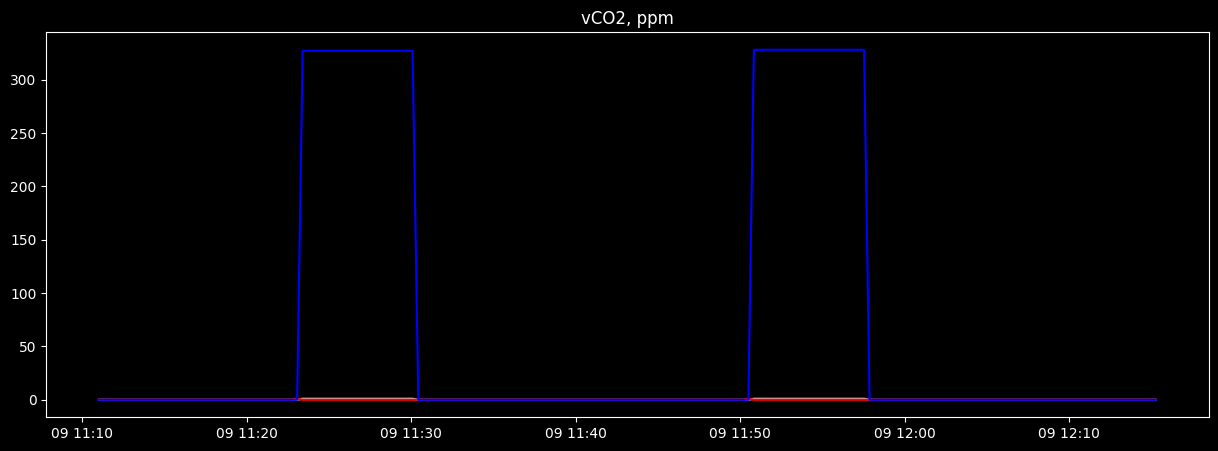

In [287]:
plt.rcParams['figure.figsize'] = [15, 5]
fig, axs = plt.subplots(1, 1)

axs.set_title('vCO2, ppm')
axs.plot('DateTime', 'flag', '-', data=df.tail(200), c='silver')
axs.plot('DateTime', 'fluxEvent', '-', data=df.tail(200), c='red')
axs.plot('DateTime', 'fluxCount', '-', data=df.tail(200), c='blue')

In [288]:
ch_v = 'flag'
df['cCO2chm'] = df['vCO2'][(df[chnl] == 5) & (df[ch_v] == 1)] * df['PressAir'] * bfunc.getDensity(temp=0, press=1, gas='CO2') / 1000
df['cCH4chm'] = df['vCH4'][(df[chnl] == 5) & (df[ch_v] == 1)] * df['PressAir'] * bfunc.getDensity(temp=0, press=1, gas='CH4') 
df['DateSec'] = df['DateTime'].astype('int64')//10**9
for col in ['cCO2chm', 'cCH4chm']:
    df[col] = df[col].rolling(3).mean()

(19632.583333333332, 19632.75)

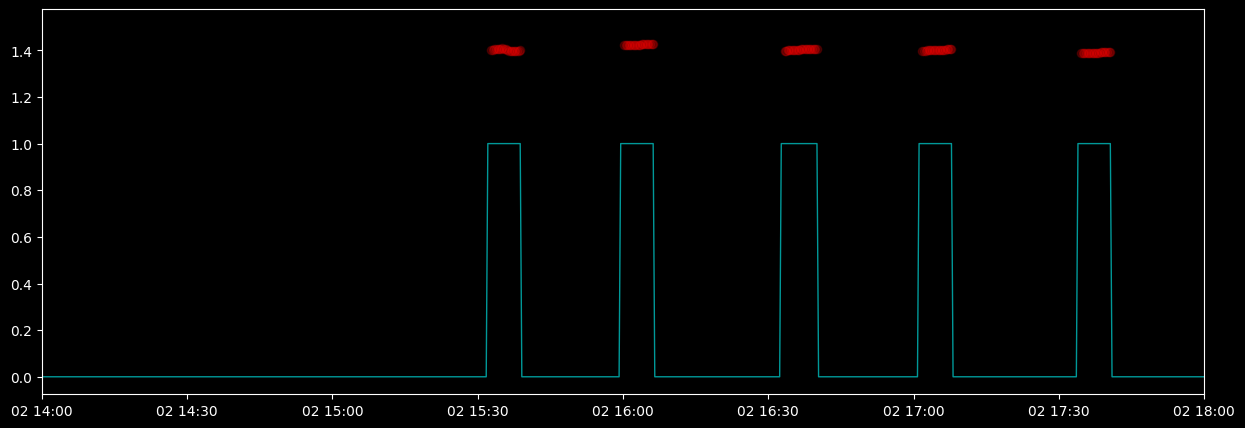

In [289]:
plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1)
ax.plot('DateTime', 'cCH4chm', 'ro', linewidth=1, alpha=0.2, data=df )
ax.plot('DateTime', 'flag', 'c-', linewidth=1, alpha=0.8, data=df)
ax.set_xlim(pd.to_datetime('02.10.2023 14:00', dayfirst=True), pd.to_datetime('02.10.2023 18:00', dayfirst=True))

In [290]:
deep = 2
df['CO2flux'] = (df['cCO2chm'].shift(-deep) - df['cCO2chm'].shift(deep)) / (df['DateSec'].shift(-deep) - df['DateSec'].shift(deep)) * 3600 / 0.81 * 320
df['CH4flux'] = (df['cCH4chm'].shift(-deep) - df['cCH4chm'].shift(deep)) / (df['DateSec'].shift(-deep) - df['DateSec'].shift(deep)) * 3600 / 0.81 * 320

In [291]:
dft = df.copy()

In [298]:
def ff(dff):
    dff.dropna(inplace=True)
    l = int(len(dff)/2)  # point to the middle of array
    return dff.sort_values()[l-2:l+2].mean()
    
dfr = dft['CO2flux'].groupby(dft['fluxCount']).apply(ff)
dft=dft.merge(dfr, how='left', right_on='fluxCount', left_on='fluxCount')
dfr = dft['CH4flux'].groupby(dft['fluxCount']).apply(ff)
dft=dft.merge(dfr, how='left', right_on='fluxCount', left_on='fluxCount')
dft

,DateTime,solar_altitude,solar_azimuth,TempAir,PressAir,Precipitation,LightLX,LightUV,vCO2,vCH4,vH2O,AirFlow,Channel,Comments,WaterFlowEqu1,WaterFlowEqu2,TempEqu1,TempEqu2,TempEqu3,FluoNxRed,FluoNxGrn,FluoNxBlu,FluoKfaRed,FluoKfaGrn,FluoKfaBlu,flag,fluxEvent,fluxCount,cCO2chm,cCH4chm,DateSec,CO2flux_x,CH4flux_x,CO2flux_y,CH4flux_y
0,2023-10-01 12:02:45,34.38410,165.77392,23.33,0.946856,0.0,573.14332,0.027412,NaN,NaN,NaN,0.42791,0.0,NaN,0.043,0.043,13.660,12.800,17.690,NaN,NaN,NaN,NaN,NaN,NaN,0,False,0,NaN,NaN,1696161765,NaN,NaN,NaN,NaN
1,2023-10-01 12:03:05,34.39688,165.87580,23.28,0.946831,0.0,573.14332,0.027412,NaN,NaN,NaN,0.42791,5.0,NaN,0.000,0.000,13.676,12.764,17.708,NaN,NaN,NaN,NaN,NaN,NaN,0,False,0,NaN,NaN,1696161785,NaN,NaN,NaN,NaN
2,2023-10-01 12:03:25,34.40936,165.97615,23.30,0.946848,0.0,573.14332,0.027437,NaN,NaN,NaN,0.42791,5.0,NaN,4.362,4.362,13.724,12.770,17.696,NaN,NaN,NaN,NaN,NaN,NaN,0,False,0,NaN,NaN,1696161805,NaN,NaN,NaN,NaN
3,2023-10-01 12:03:46,34.42174,166.07638,23.46,0.946832,0.0,573.14332,0.027553,NaN,NaN,NaN,0.42791,5.0,NaN,4.748,4.748,13.718,12.764,17.702,NaN,NaN,NaN,NaN,NaN,NaN,0,False,0,NaN,NaN,1696161826,NaN,NaN,NaN,NaN
4,2023-10-01 12:04:06,34.43395,166.17603,23.54,0.946812,0.0,573.14332,0.027632,NaN,NaN,NaN,0.42791,5.0,NaN,4.735,4.735,13.706,12.746,17.675,NaN,NaN,NaN,NaN,NaN,NaN,0,False,0,NaN,NaN,1696161846,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34299,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,0,NaN,NaN,-9223372037,NaN,NaN,NaN,NaN
34300,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,0,NaN,NaN,-9223372037,NaN,NaN,NaN,NaN
34301,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,0,NaN,NaN,-9223372037,NaN,NaN,NaN,NaN
34302,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,0,NaN,NaN,-9223372037,NaN,NaN,NaN,NaN


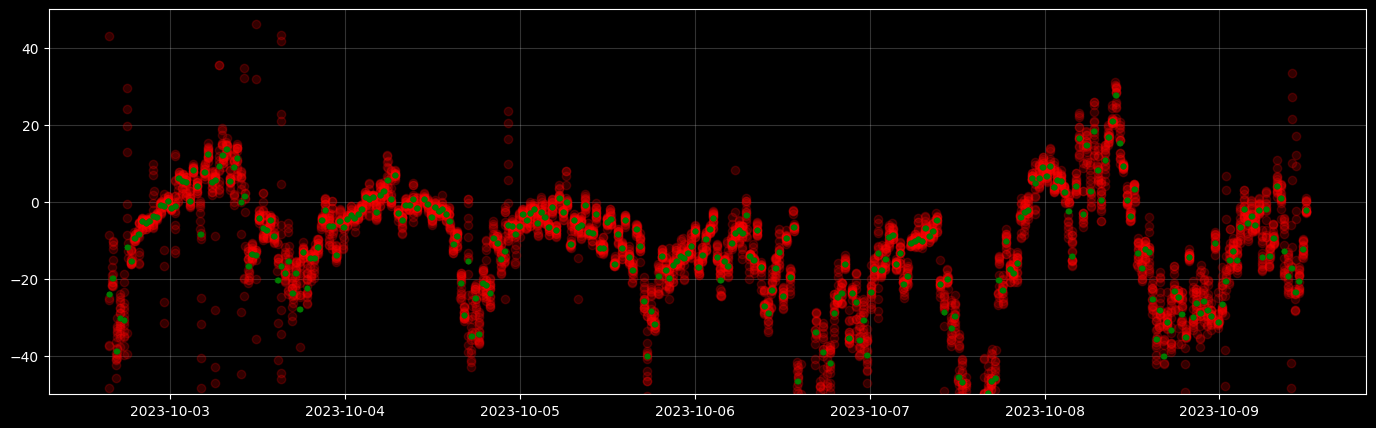

In [299]:
plt.rcParams['figure.figsize'] = [17, 5]
fig, ax = plt.subplots(1)
ax.plot('DateTime', 'CO2flux_x', 'ro', linewidth=1, alpha=0.2, data=dft)
ax.plot('DateTime', 'CO2flux_y', 'go', linewidth=1, alpha=0.2, data=dft, markersize=3)
# ax.set_xlim(pd.to_datetime('02.10.2023 14:00', dayfirst=True), pd.to_datetime('08.10.2023 18:00', dayfirst=True))
ax.set_ylim(-50, 50)
ax.grid(alpha=0.2)

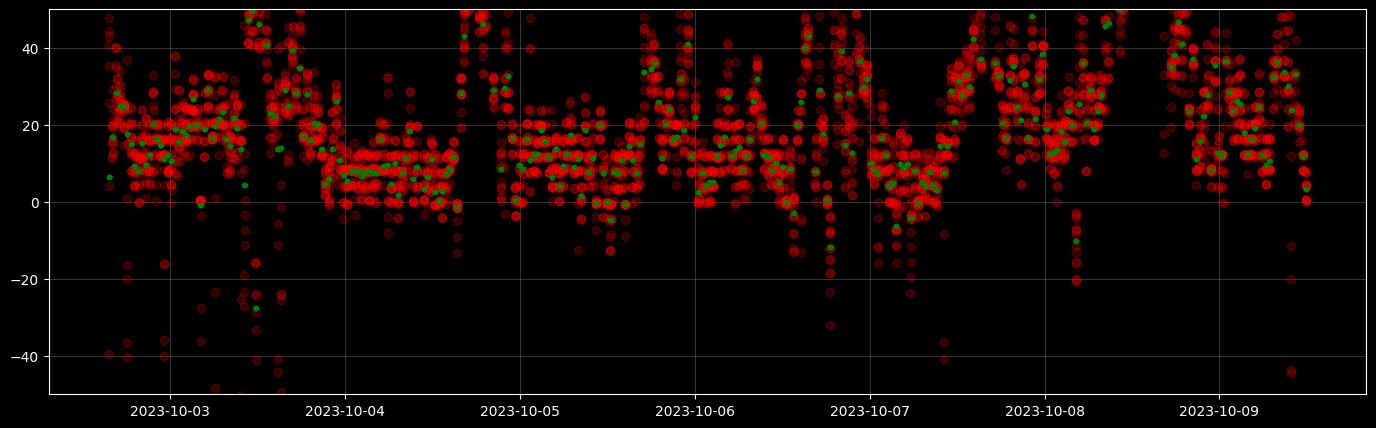

In [300]:
plt.rcParams['figure.figsize'] = [17, 5]
fig, ax = plt.subplots(1)
ax.plot('DateTime', 'CH4flux_x', 'ro', linewidth=1, alpha=0.2, data=dft)
ax.plot('DateTime', 'CH4flux_y', 'go', linewidth=1, alpha=0.2, data=dft, markersize=3)
# ax.set_xlim(pd.to_datetime('02.10.2023 14:00', dayfirst=True), pd.to_datetime('08.10.2023 18:00', dayfirst=True))
ax.set_ylim(-50, 50)
ax.grid(alpha=0.2)

(-200.0, 200.0)

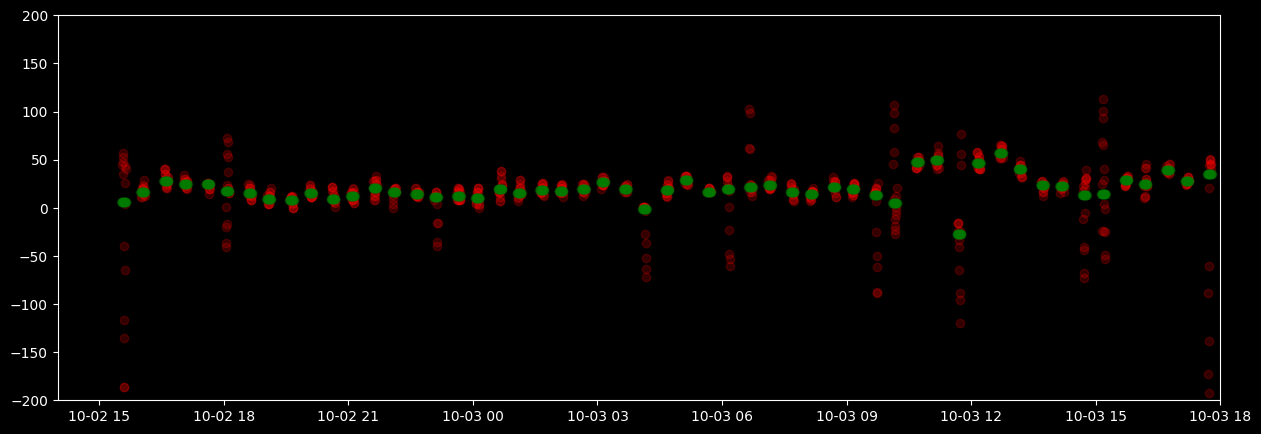

In [301]:
plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1)
ax.plot('DateTime', 'CH4flux_x', 'ro', linewidth=1, alpha=0.2, data=dft)
ax.plot('DateTime', 'CH4flux_y', 'go', linewidth=1, alpha=0.2, data=dft)
ax.set_xlim(pd.to_datetime('02.10.2023 14:00', dayfirst=True), pd.to_datetime('03.10.2023 18:00', dayfirst=True))
ax.set_ylim(-200, 200)

In [302]:
df = dft.copy()

In [168]:
filter_list = [{'date_start': '07.08.2023 17:00', 'date_stop': '07.08.2023 17:10', 'cols': ['CO2flux', 'CH4flux'], 'fill_with': np.NaN},   # Wrench is blocked
               {'date_start': '08.08.2023 01:30', 'date_stop': '08.08.2023 11:20', 'cols': ['CO2flux', 'CH4flux'], 'fill_with': np.NaN},   # Wrench is blocked
              ]

for cycle in filter_list:
    date_start = pd.to_datetime(cycle['date_start'], dayfirst=True)
    date_stop = pd.to_datetime(cycle['date_stop'], dayfirst=True)
    for col in cycle['cols']:
        df.loc[(df['DateTime'] > date_start) & (df['DateTime'] < date_stop), col] = cycle['fill_with']

In [242]:
## do not know why is it here
df = df.resample('20S', on='DateTime').mean()
df[chnl].fillna(method='ffill', inplace=True)

In [ ]:
df['DateTime'] = df.index


In [304]:
df['reff'] = 1
ch_v = 'Chn_valid'
df[ch_v] = 1
for deep in range(1, 7):
    df.loc[df[chnl] != df[chnl].shift(deep), ch_v] = 0
df.dropna(axis='index', subset=['reff'], inplace=True)

In [305]:
df

,DateTime,solar_altitude,solar_azimuth,TempAir,PressAir,Precipitation,LightLX,LightUV,vCO2,vCH4,vH2O,AirFlow,Channel,Comments,WaterFlowEqu1,WaterFlowEqu2,TempEqu1,TempEqu2,TempEqu3,FluoNxRed,FluoNxGrn,FluoNxBlu,FluoKfaRed,FluoKfaGrn,FluoKfaBlu,flag,fluxEvent,fluxCount,cCO2chm,cCH4chm,DateSec,CO2flux_x,CH4flux_x,CO2flux_y,CH4flux_y,Chn_valid,reff
0,2023-10-01 12:02:45,34.38410,165.77392,23.33,0.946856,0.0,573.14332,0.027412,NaN,NaN,NaN,0.42791,0.0,NaN,0.043,0.043,13.660,12.800,17.690,NaN,NaN,NaN,NaN,NaN,NaN,0,False,0,NaN,NaN,1696161765,NaN,NaN,NaN,NaN,0,1
1,2023-10-01 12:03:05,34.39688,165.87580,23.28,0.946831,0.0,573.14332,0.027412,NaN,NaN,NaN,0.42791,5.0,NaN,0.000,0.000,13.676,12.764,17.708,NaN,NaN,NaN,NaN,NaN,NaN,0,False,0,NaN,NaN,1696161785,NaN,NaN,NaN,NaN,0,1
2,2023-10-01 12:03:25,34.40936,165.97615,23.30,0.946848,0.0,573.14332,0.027437,NaN,NaN,NaN,0.42791,5.0,NaN,4.362,4.362,13.724,12.770,17.696,NaN,NaN,NaN,NaN,NaN,NaN,0,False,0,NaN,NaN,1696161805,NaN,NaN,NaN,NaN,0,1
3,2023-10-01 12:03:46,34.42174,166.07638,23.46,0.946832,0.0,573.14332,0.027553,NaN,NaN,NaN,0.42791,5.0,NaN,4.748,4.748,13.718,12.764,17.702,NaN,NaN,NaN,NaN,NaN,NaN,0,False,0,NaN,NaN,1696161826,NaN,NaN,NaN,NaN,0,1
4,2023-10-01 12:04:06,34.43395,166.17603,23.54,0.946812,0.0,573.14332,0.027632,NaN,NaN,NaN,0.42791,5.0,NaN,4.735,4.735,13.706,12.746,17.675,NaN,NaN,NaN,NaN,NaN,NaN,0,False,0,NaN,NaN,1696161846,NaN,NaN,NaN,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34299,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,0,NaN,NaN,-9223372037,NaN,NaN,NaN,NaN,0,1
34300,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,0,NaN,NaN,-9223372037,NaN,NaN,NaN,NaN,0,1
34301,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,0,NaN,NaN,-9223372037,NaN,NaN,NaN,NaN,0,1
34302,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,0,NaN,NaN,-9223372037,NaN,NaN,NaN,NaN,0,1


In [306]:
df['vCO2air'] = df['vCO2'][(df[chnl] == 6) & (df[ch_v] == 1)]
df['vCH4air'] = df['vCH4'][(df[chnl] == 6) & (df[ch_v] == 1)]
for col in ['vCO2air', 'vCH4air',]:
    df[col] = df[col].rolling(3).mean()

df['vCO2air'].interpolate(method='values', inplace=True)
df['vCH4air'].interpolate(method='values', inplace=True)  ## `time` method mb better
df['pCO2air'] = df['vCO2air'] * df['PressAir']  # mkatm
df['pCH4air'] = df['vCH4air'] * df['PressAir']  # mkatm

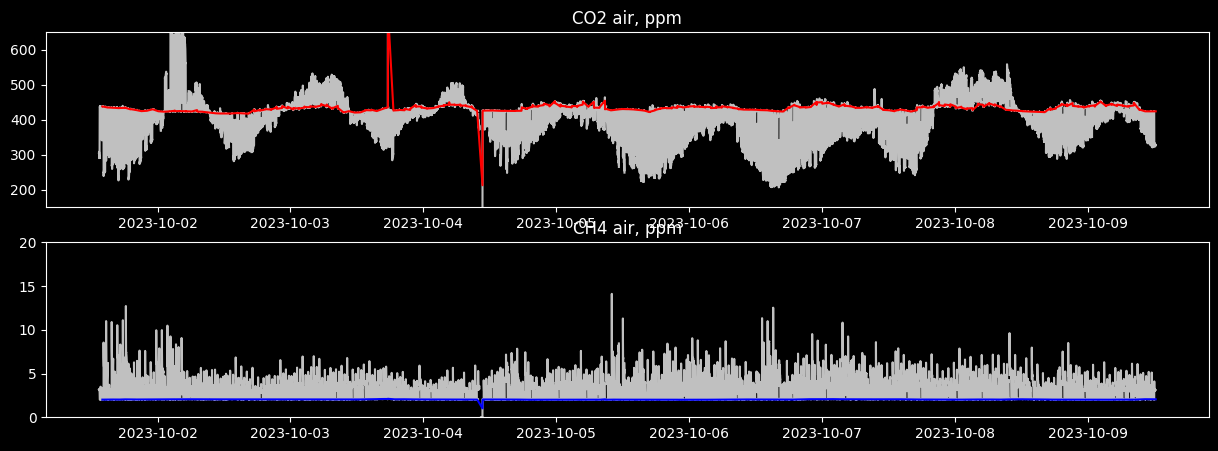

In [311]:
plt.rcParams['figure.figsize'] = [15, 5]
fig, axs = plt.subplots(2, 1)

axs[0].set_title('CO2 air, ppm')
axs[0].set_ylim(150, 650)
axs[0].plot(df.DateTime, df['vCO2'], '-', c='silver')
axs[0].plot(df.DateTime, df['vCO2air'], 'r-')

axs[1].set_title('CH4 air, ppm')
axs[1].set_ylim(0, 20)
axs[1].plot(df.DateTime, df['vCH4'], '-', c='silver')
axs[1].plot(df.DateTime, df['vCH4air'], 'b-')
fig.savefig(saveImgPath+'cAir_vs_time.png', transparent=False)

In [312]:
df.columns

Index(['DateTime', 'solar_altitude', 'solar_azimuth', 'TempAir', 'PressAir',
       'Precipitation', 'LightLX', 'LightUV', 'vCO2', 'vCH4', 'vH2O',
       'AirFlow', 'Channel', 'Comments', 'WaterFlowEqu1', 'WaterFlowEqu2',
       'TempEqu1', 'TempEqu2', 'TempEqu3', 'FluoNxRed', 'FluoNxGrn',
       'FluoNxBlu', 'FluoKfaRed', 'FluoKfaGrn', 'FluoKfaBlu', 'flag',
       'fluxEvent', 'fluxCount', 'cCO2chm', 'cCH4chm', 'DateSec', 'CO2flux_x',
       'CH4flux_x', 'CO2flux_y', 'CH4flux_y', 'Chn_valid', 'reff', 'vCO2air',
       'vCH4air', 'pCO2air', 'pCH4air'],
      dtype='object')

## RECOVERY !!!

In [313]:
df['DateSec'] = df['DateTime'].astype('int64')//10**9
df['dTSec'] = df['DateSec'] - df['DateSec'].shift(1)
dt = df['dTSec'] / 60   ## delta time, min
ch_v = 'Chn_valid'

#### recovery `CO2/CH4`, channel `1` (bottom in Oct 2023)

In [314]:
equ_vol = scheme.equ_walltube_param['equ_vol']  # equivalent equ volume, l
equ_cap = scheme.equ_walltube_param['equ_cap']  # equilibrator capacity
wtr_flow_min = scheme.equ_walltube_param['water_flow_min'] 

In [315]:
t_wtr = df['TempEqu1']
t_air = t_wtr
wtr_flow = df['WaterFlowEqu1']
air_flow = df['AirFlow']

In [316]:
### CO2 water
df['vCO2equ'] = df['vCO2'][(df[chnl] == 1) & (df[ch_v] == 1) & (wtr_flow > wtr_flow_min)]
solubility = bfunc.getSolubility(t_wtr, 'CO2')

density = bfunc.getDensity(t_air, df['PressAir'], 'CO2')
cGasAir = df['pCO2air'] / 1000000 * density
pGasEquAir = df['vCO2equ'] * df['PressAir']
cGasEquAir = pGasEquAir * density / 1000000  # g/l

tau = equ_vol/(air_flow+wtr_flow*equ_cap*solubility/density)
eternal = (cGasEquAir-cGasEquAir.shift(1)*np.exp(-1*dt/tau))/(1-np.exp(-1*dt/tau))
cGasWtr = (eternal*(wtr_flow*equ_cap*solubility/density+air_flow)-air_flow*cGasAir)/(wtr_flow*equ_cap)

df['cCO2bot'] = cGasWtr * 1000     # mg/l
df['pCO2bot'] = cGasWtr * 1000000 / solubility  # mkatm

In [317]:
### CH4 water
df['vCH4equ'] = df['vCH4'][(df[chnl] == 1) & (df[ch_v] == 1)]
solubility = bfunc.getSolubility(t_wtr, 'CH4')

density = bfunc.getDensity(t_air, df['PressAir'], 'CH4')
cGasAir = df['pCH4air'] / 1000000 * density
pGasEquAir = df['vCH4equ'] * df['PressAir']
cGasEquAir = pGasEquAir * density / 1000000  # g/l

tau = equ_vol/(air_flow+wtr_flow*equ_cap*solubility/density)
eternal = (cGasEquAir-cGasEquAir.shift(1)*np.exp(-1*dt/tau))/(1-np.exp(-1*dt/tau))
cGasWtr = (eternal*(wtr_flow*equ_cap*solubility/density+air_flow)-air_flow*cGasAir)/(wtr_flow*equ_cap)
df['cCH4bot'] = cGasWtr * 1000000000    # ng/l
df['pCH4bot'] = cGasWtr * 1000000 / solubility  # mkatm

#### recovery `CO2/CH4`, channel `2` (surface in oct 2023)

In [318]:
t_wtr = df['TempEqu2']
t_air = t_wtr
wtr_flow = df['WaterFlowEqu1']  # waterflow sensor at channel #2 didn't work properly

In [319]:
### CO2 water
df['vCO2equ'] = df['vCO2'][(df[chnl] == 2) & (df[ch_v] == 1) & (wtr_flow > wtr_flow_min)]
solubility = bfunc.getSolubility(t_wtr, 'CO2')

density = bfunc.getDensity(t_air, df['PressAir'], 'CO2')
cGasAir = df['pCO2air'] / 1000000 * density
pGasEquAir = df['vCO2equ'] * df['PressAir']
cGasEquAir = pGasEquAir * density / 1000000  # g/l

tau = equ_vol/(air_flow+wtr_flow*equ_cap*solubility/density)
eternal = (cGasEquAir-cGasEquAir.shift(1)*np.exp(-1*dt/tau))/(1-np.exp(-1*dt/tau))
cGasWtr = (eternal*(wtr_flow*equ_cap*solubility/density+air_flow)-air_flow*cGasAir)/(wtr_flow*equ_cap)

df['cCO2sur'] = cGasWtr * 1000     # mg/l
df['pCO2sur'] = cGasWtr * 1000000 / solubility  # mkatm

In [320]:
### CH4 water
df['vCH4equ'] = df['vCH4'][(df[chnl] == 2) & (df[ch_v] == 1)]
solubility = bfunc.getSolubility(df['TempEqu1'], 'CH4')

density = bfunc.getDensity(t_air, df['PressAir'], 'CH4')
cGasAir = df['pCH4air'] / 1000000 * density
pGasEquAir = df['vCH4equ'] * df['PressAir']
cGasEquAir = pGasEquAir * density / 1000000  # g/l

tau = equ_vol/(air_flow+wtr_flow*equ_cap*solubility/density)
eternal = (cGasEquAir-cGasEquAir.shift(1)*np.exp(-1*dt/tau))/(1-np.exp(-1*dt/tau))
cGasWtr = (eternal*(wtr_flow*equ_cap*solubility/density+air_flow)-air_flow*cGasAir)/(wtr_flow*equ_cap)
df['cCH4sur'] = cGasWtr * 1000000000    # ng/l
df['pCH4sur'] = cGasWtr * 1000000 / solubility  # mkatm

In [324]:
## rolling average is applied inplace. Be cafelly, run this cell **ONCE**

for col in ['cCO2sur', 'cCO2bot', 'pCO2sur', 'pCO2bot', 'cCH4sur', 'pCH4sur', 'cCH4bot', 'pCH4bot']:
    df.loc[df[col] == np.inf , col] = np.nan 
    df.loc[df[col] == -np.inf , col] = np.nan
    df.loc[df[col] <= 0 , col] = np.nan
    df[col] = df[col].rolling(3, center=True).mean()

In [325]:
df['pCH4bot'].describe()

count    7864.000000
mean       10.657158
std         4.291191
min         4.081918
25%         7.980899
50%         9.623962
75%        11.668110
max        37.111903
Name: pCH4bot, dtype: float64

In [326]:
df['pCH4sur'].describe()

count    7773.000000
mean       12.624525
std         4.408218
min         4.003937
25%         9.836662
50%        11.752719
75%        14.374875
max        48.801078
Name: pCH4sur, dtype: float64

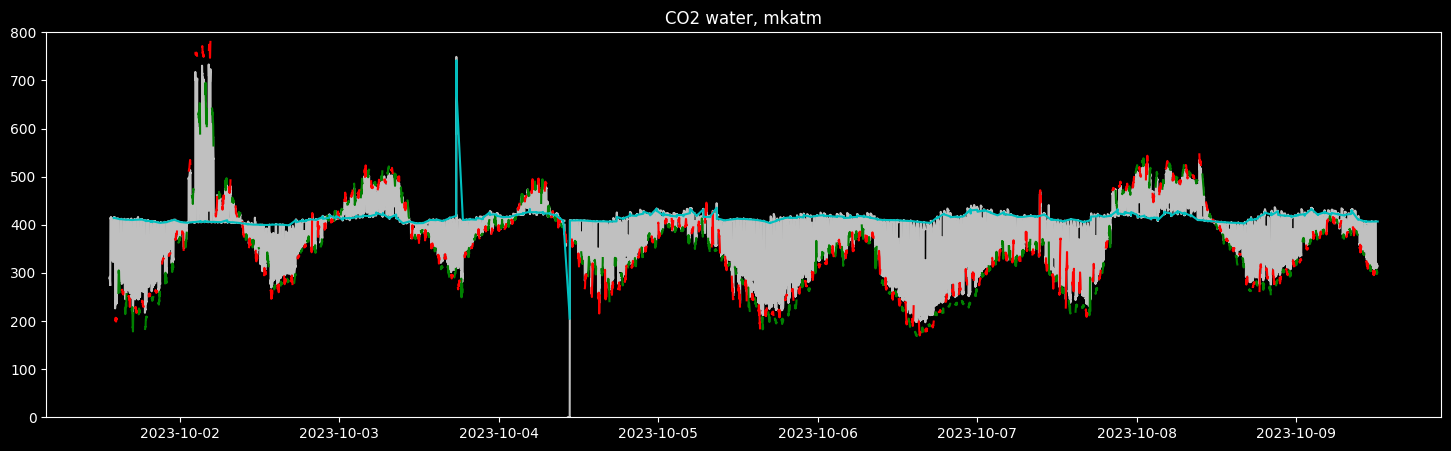

In [327]:
df['pCO2'] = df['vCO2'] * df['PressAir']

plt.rcParams['figure.figsize'] = [18, 5]
fig, ax = plt.subplots()
## ax.set_xlim(pd.to_datetime('05.06.2023 18:00:00', dayfirst=True), pd.to_datetime('05.06.2023 19:00:00', dayfirst=True))
ax.set_title('CO2 water, mkatm')
ax.set_ylim(0, 800)
ax.plot(df.DateTime, df['pCO2'], '-', c='silver')
ax.plot(df.DateTime, df['pCO2sur'], 'g-')
ax.plot(df.DateTime, df['pCO2bot'], 'r-')
ax.plot(df.DateTime, df['pCO2air'], 'c-')
fig.savefig(saveImgPath+'pCO2wtr_vs_time.png')

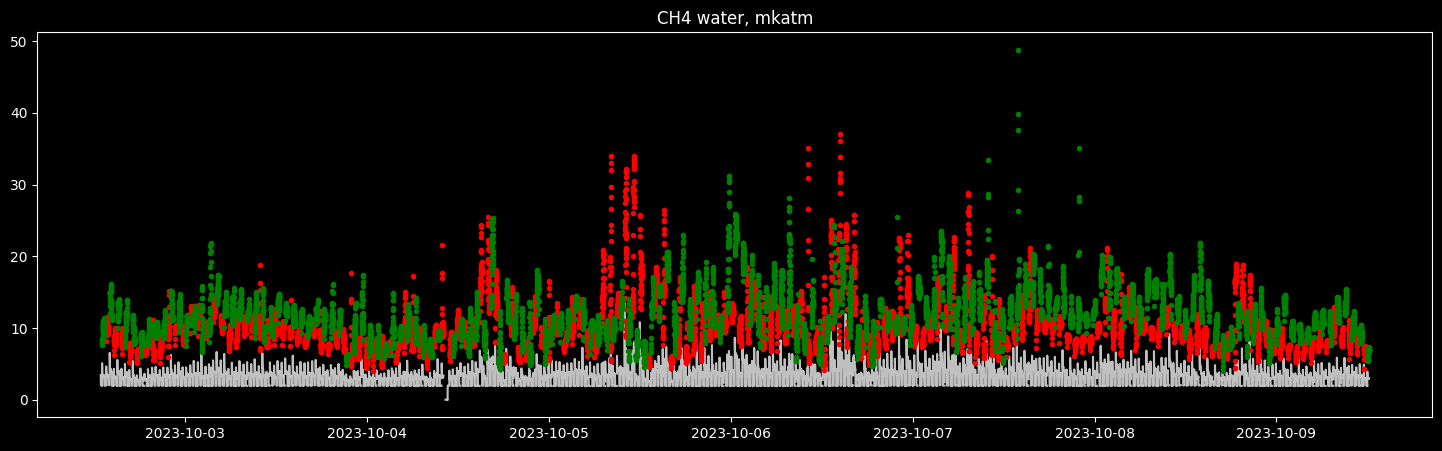

In [328]:
count_recent = 30000
df['pCH4'] = df['vCH4'] * df['PressAir']
plt.rcParams['figure.figsize'] = [18, 5]
fig, ax = plt.subplots()
ax.set_title('CH4 water, mkatm')
# ax.set_xlim(pd.to_datetime('06.06.2023 10:00:00', dayfirst=True), pd.to_datetime('06.06.2023 19:00:00', dayfirst=True))
# ax.set_ylim(0, 20)
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['pCH4'], '-', c='silver')
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['pCH4bot'], 'r.')
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['pCH4sur'], 'g.')
fig.savefig(saveImgPath+'pCH4wtr_vs_time.png')

In [329]:
df.columns

Index(['DateTime', 'solar_altitude', 'solar_azimuth', 'TempAir', 'PressAir',
       'Precipitation', 'LightLX', 'LightUV', 'vCO2', 'vCH4', 'vH2O',
       'AirFlow', 'Channel', 'Comments', 'WaterFlowEqu1', 'WaterFlowEqu2',
       'TempEqu1', 'TempEqu2', 'TempEqu3', 'FluoNxRed', 'FluoNxGrn',
       'FluoNxBlu', 'FluoKfaRed', 'FluoKfaGrn', 'FluoKfaBlu', 'flag',
       'fluxEvent', 'fluxCount', 'cCO2chm', 'cCH4chm', 'DateSec', 'CO2flux_x',
       'CH4flux_x', 'CO2flux_y', 'CH4flux_y', 'Chn_valid', 'reff', 'vCO2air',
       'vCH4air', 'pCO2air', 'pCH4air', 'dTSec', 'vCO2equ', 'cCO2bot',
       'pCO2bot', 'vCH4equ', 'cCH4bot', 'pCH4bot', 'cCO2sur', 'pCO2sur',
       'cCH4sur', 'pCH4sur', 'pCO2', 'pCH4'],
      dtype='object')

In [331]:
df['hour'] = df['DateTime'].dt.hour # + df['DateTime'].dt.minute / 60
df['hour']

0        12.0
1        12.0
2        12.0
3        12.0
4        12.0
         ... 
34299     NaN
34300     NaN
34301     NaN
34302     NaN
34303     NaN
Name: hour, Length: 34304, dtype: float64

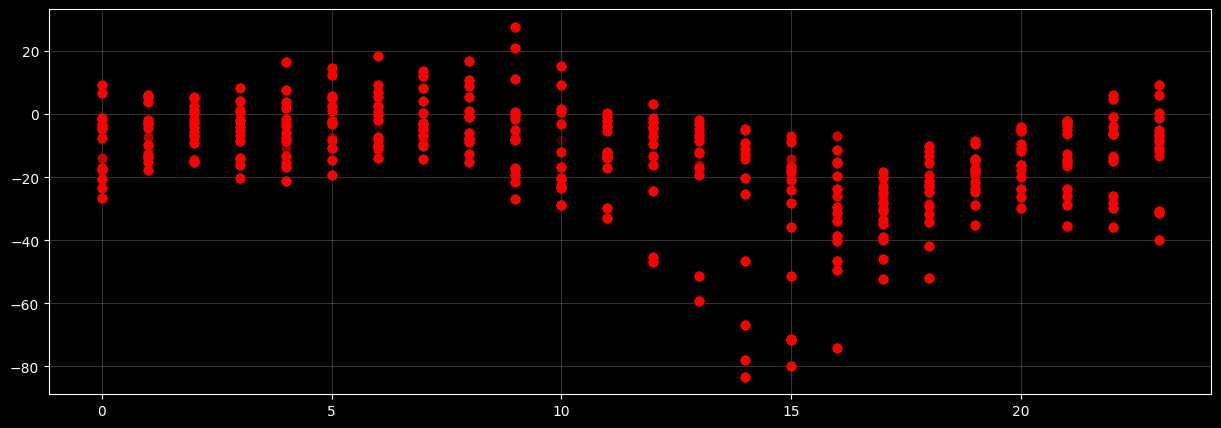

In [342]:
plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1)
ax.plot(df['hour'], df['CO2flux_y'], 'ro', linewidth=1, alpha=0.2, data=df )
ax.grid(alpha=.2)
# ax.set_ylim(-100, 10)

In [346]:
cols = ['hour', 'DateSec', 'TempAir', 'PressAir', 'Precipitation', 'LightLX', 'LightUV',
        'vCO2', 'vCH4', 'vH2O', 'AirFlow', 'Channel',
        'FluoNxRed', 'FluoNxGrn', 'FluoNxBlu', 'FluoKfaRed', 'FluoKfaGrn', 'FluoKfaBlu', 'WaterFlowEqu1',
        'WaterFlowEqu2', 'WaterFlowEqu3', 'WaterFlowEqu4',
        'TempEqu1', 'TempEqu2', 'TempEqu3', 'cCO2chm', 'cCH4chm',
        'CO2flux', 'CH4flux', 'vCO2air', 'vCH4air',
        'pCO2air', 'pCH4air', 'cCO2sur', 'pCO2sur',
        'cCH4sur', 'pCH4sur', 'cCO2bot', 'pCO2bot', 'cCH4bot', 'pCH4bot',]
df.to_csv(f'{saveDataPath}BaikalOct2023.dat',
          # columns=cols,
          sep='\t',
         )

In [347]:
func_list = ['mean', 'std']
hourly = df.resample('1H', on='DateTime').agg(func_list)

cols = ['hour', 'DateSec', 'TempAir', 'PressAir', 'Precipitation', 'LightLX', 'LightUV',
        'vCO2', 'vCH4', 'vH2O',
        'FluoNxRed', 'FluoNxGrn', 'FluoNxBlu', 'FluoKfaRed', 'FluoKfaGrn', 'FluoKfaBlu', 'WaterFlowEqu1',
        'TempEqu1', 'TempEqu2', 'TempEqu3', 'cCO2chm', 'cCH4chm',
        'CO2flux', 'CH4flux', 'vCO2air', 'vCH4air',
        'pCO2air', 'pCH4air', 'cCO2sur', 'pCO2sur',
        'cCH4sur', 'pCH4sur', 'cCO2bot', 'pCO2bot', 'cCH4bot', 'pCH4bot',]
hourly.to_csv(f'{saveDataPath}BaikalOct2023hourly.dat',
              # columns=cols,
              sep='\t',
             )